<a href="https://colab.research.google.com/github/lfastino0306/MVP-Sprint-Machine-Learning-Analytics-/blob/main/MVP_Sprint_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso: Ciência de Dados e Analytics (PUC Rio)**

**Sprint: Machine Learning & Analytics**

Aluno:
Leonardo Faustino de Souza Ribeiro

**Abrangência:**

SPRINT - MVP - letra a - modelo utilizando métodos clássicos para um problema de classificação ou regressão

**Problema:**

A obesidade é uma epidemia global crescente, apresentando sérios desafios de saúde pública e impactos socioeconômicos significativos. Com o aumento alarmante das taxas de obesidade em todo o mundo, torna-se imperativo desenvolver abordagens inovadoras e eficazes para prever, diagnosticar e tratar essa condição complexa. Neste contexto, o uso de técnicas avançadas de aprendizado de máquina surge como uma ferramenta promissora para analisar grandes conjuntos de dados relacionados à obesidade, identificar padrões ocultos e fornecer insights valiosos para orientar intervenções personalizadas e políticas de saúde pública mais eficazes. No entanto, os desafios enfrentados ao lidar com dados multifacetados e dinâmicos sobre obesidade exigem abordagens sofisticadas de modelagem e análise, destacando a necessidade premente de pesquisa nesta área.


**Descrição e Hipótese:**

A partir dos indicadores é possível definir perfil por vários critérios. maneira, algumas abordagens são possíveis, como:

**Classificação:** pode ser usado algoritmos de classificação, como Regressão Logística, Árvores de Decisão, Random Forest e outros, para prever perfil de pessoas e suas tendencias com base nos atributos fornecidos. Isso pode ajudar a identificar padrões e características distintas de cada prestadora em relação aos indicadores de qualidade.

**Previsão de resultados:** A aplicação de modelos de regressão, como Regressão Linear, Árvore de Decisão e Random Forest, permite prever indicadores relacionados à obesidade com base em atributos fornecidos. Por exemplo, é possível prever os fatores mais comuns associados a diferentes tipos de obesidade em um indivíduo. Isso proporciona insights valiosos para compreender os principais determinantes dessa condição e orientar intervenções personalizadas.

**Clusterização:** Ao utilizar algoritmos de clusterização, como K-means ou DBSCAN, é possível agrupar dados de várias pessoas com base em indicadores como sexo, idade, entre outros. Essa abordagem ajuda a identificar padrões comportamentais e estilos de vida entre indivíduos com sobrepeso, possibilitando uma compreensão mais aprofundada das diferentes características e necessidades desse grupo populacional.

**Análise de importância de atributos:** também pode se utilizar algoritmos como Árvores de Decisão ou Random Forest para determinar a importância de cada atributo na previsão dos resultados dos indicadores. Isso pode ajudar a identificar quais atributos têm maior influência nos resultados e auxiliar na tomada de decisões.

**Restrições:**

É importante ressaltar que as informações e resultados apresentados neste estudo são puramente especulativos no âmbito acadêmico.

O método de análise proposto para a aplicação dos modelos é especulativo e não garante que seus resultados sejam aplicáveis na prática. Ele representa apenas uma tentativa de encontrar um caminho para minimizar a aplicação do modelo de aprendizado de máquina a toda a base de dados, levando em consideração o alto custo computacional que isso acarretaria.

**Importando as bibliotecas**

**O conjunto de bibliotecas utilizado no código inclui:**

pandas para manipulação e análise de dados;


numpy para operações numéricas e manupulação de arrays multidimensionais;

**Além dessas, faz uso de várias bibliotecas do scikit-learn para pré-processamento, modelagem e avaliação de modelos de aprendizado de máquina como:**

LabelEncoder, OneHotEncoder e OrdinalEncoder para codificação de variáveis categóricas;
StandardScaler para escalonamento de dados numéricos;
train_test_split para divisão dos dados em conjuntos de treinamento e teste;
Pipeline e ColumnTransformer para criação de pipelines de pré-processamento;
RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, GaussianNB e SVC para diferentes algoritmos de classificação;
accuracy_score, precision_score, recall_score e f1_score para métricas de avaliação de modelos;
GridSearchCV para busca em grid de hiperparâmetros;
classification_report para relatório de classificação, e
matplotlib.pyplot para visualização de resultados em gráficos.

In [16]:
!pip install kmodes

In [17]:
# Uso geral
import pandas as pd
import numpy as np
import markdown
import joblib
import warnings
from tabulate import tabulate

#Gráficos
import matplotlib.pyplot as plt

# Pré-processamentode dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

# Machine Leaning

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from kmodes.kmodes import KModes

# Estatística e Análise de dados
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

**Carga dos Dados:**

In [18]:
import pandas as pd

# URL do arquivo no GitHub
url = 'https://raw.githubusercontent.com/lfastino0306/MVP-Sprint-Machine-Learning-Analytics-/main/ObesityDataSet_raw_and_data_sinthetic.csv'

# Carregar o arquivo CSV para um DataFrame do Pandas
df = pd.read_csv(url)

# Exibir as primeiras linhas do DataFrame para garantir que os dados foram carregados corretamente
display(df)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


Sobre o Conjunto de Dados

Obesidade


Informações do Conjunto de Dados

Este conjunto de dados inclui dados para a estimativa dos níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física. Os dados contêm 17 atributos e 2111 registros. Os registros são rotulados com a variável de classe NObesity (Nível de Obesidade), que permite a classificação dos dados usando os valores de Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III. 77% dos dados foram gerados sinteticamente usando a ferramenta Weka e o filtro SMOTE, 23% dos dados foram coletados diretamente dos usuários por meio de uma plataforma web.



* Gender: Característica, Categórica, "Gênero"

* Age: Característica, Contínua, "Idade"

* Height: Característica, Contínua "Altura"

* Weight: Característica, Contínua "Peso"
histórico_familiar_com_sobrepeso: Característica, Binária, "Um membro da família sofreu ou sofre de sobrepeso?"

* FAVC: Característica, Binária, "Você come alimentos com alto teor calórico com frequência?"

* FCVC: Característica, Inteira, "Você costuma comer vegetais nas suas refeições?"

* NCP: Característica, Contínua, "Quantas refeições principais você faz diariamente?"

* CAEC: Característica, Categórica, "Você come alguma coisa entre as refeições?"

* SMOKE: Característica, Binária, "Você fuma?"

* CH2O: Característica, Contínua, "Quanta água você bebe diariamente?"

* SCC: Característica, Binária, "Você monitora as calorias que consome diariamente?"

* FAF: Característica, Contínua, "Com que frequência você pratica atividade física?"

* TUE: Característica, Inteira, "Quanto tempo você usa dispositivos tecnológicos, como celular, videogames, televisão, computador e outros?"

* CALC: Característica, Categórica, "Com que frequência você bebe álcool?"
MTRANS: Característica, Categórica, "Qual transporte você costuma usar?"
NObeyesdad: Alvo, Categórica, "Nível de obesidade"

* MTRANS : Característica, Categórica, " Qual transporte você costuma usar? "

* NObeyesdad : Alvo, Categórico, "Nível de obesidade"

Sobre o Conjunto de Dados

Obesidade


Informações do Conjunto de Dados

Este conjunto de dados inclui dados para a estimativa dos níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física. Os dados contêm 17 atributos e 2111 registros. Os registros são rotulados com a variável de classe NObesity (Nível de Obesidade), que permite a classificação dos dados usando os valores de Peso Insuficiente, Peso Normal, Sobrepeso Nível I, Sobrepeso Nível II, Obesidade Tipo I, Obesidade Tipo II e Obesidade Tipo III. 77% dos dados foram gerados sinteticamente usando a ferramenta Weka e o filtro SMOTE, 23% dos dados foram coletados diretamente dos usuários por meio de uma plataforma web.



* Gender: Característica, Categórica, "Gênero"

* Age: Característica, Contínua, "Idade"

* Height: Característica, Contínua "Altura"

* Weight: Característica, Contínua "Peso"
histórico_familiar_com_sobrepeso: Característica, Binária, "Um membro da família sofreu ou sofre de sobrepeso?"

* FAVC: Característica, Binária, "Você come alimentos com alto teor calórico com frequência?"

* FCVC: Característica, Inteira, "Você costuma comer vegetais nas suas refeições?"

* NCP: Característica, Contínua, "Quantas refeições principais você faz diariamente?"

* CAEC: Característica, Categórica, "Você come alguma coisa entre as refeições?"

* SMOKE: Característica, Binária, "Você fuma?"

* CH2O: Característica, Contínua, "Quanta água você bebe diariamente?"

* SCC: Característica, Binária, "Você monitora as calorias que consome diariamente?"

* FAF: Característica, Contínua, "Com que frequência você pratica atividade física?"

* TUE: Característica, Inteira, "Quanto tempo você usa dispositivos tecnológicos, como celular, videogames, televisão, computador e outros?"

* CALC: Característica, Categórica, "Com que frequência você bebe álcool?"
MTRANS: Característica, Categórica, "Qual transporte você costuma usar?"
NObeyesdad: Alvo, Categórica, "Nível de obesidade"

* MTRANS : Característica, Categórica, " Qual transporte você costuma usar? "

* NObeyesdad : Alvo, Categórico, "Nível de obesidade"

In [19]:
# Carregar os dados de entrada X e os rótulos y
X = df[['Age', 'Height', 'Weight', 'CAEC', 'MTRANS']]
y = df[['Gender', 'NObeyesdad']]

# Separar os dados em conjuntos de treinamento e teste (por exemplo, 80% para treinamento e 20% para teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

#X_treino, X_teste, y_treino e y_teste prontos para serem usados em seu modelo de aprendizado de máquina



In [20]:
#DataFrame contendo as variáveis categóricas
df_encoded = pd.get_dummies(df)

# Exiba linhas do DataFrame codificado
display(df_encoded)


# Definir as características numéricas e categóricas
numeric_features = ['Height', 'Weight','Age']
categorical_features = ['CAEC', 'MTRANS']

# Definir os transformadores para as características numéricas e categóricas
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Definir o pré-processador que aplica as transformações nas características
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Definir modelos
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Definir o número de folds para a validação cruzada
n_folds = 5

# Definir o objeto KFold
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Suprimir warnings de convergência
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Realizar validação cruzada para os atributos "Gender" e "NObeyesdad"
for atributo in ['Gender', 'NObeyesdad']:
    print(f"Resultados para o atributo '{atributo}':")
    for model_name, model in models.items():
        # Criar pipeline com pré-processamento e modelo
        pipeline = make_pipeline(preprocessor, model)
        # Realizar validação cruzada
        scores = cross_val_score(pipeline, X, y[atributo], cv=kf, scoring='accuracy')


# Lista para armazenar os resultados
resultados = []

# Realizar validação cruzada para os atributos "Gender" e "NObeyesdad"
for atributo in ['Gender', 'NObeyesdad']:
    for model_name, model in models.items():
        # Criar pipeline com pré-processamento e modelo
        pipeline = make_pipeline(preprocessor, model)
        # Realizar validação cruzada
        scores = cross_val_score(pipeline, X, y[atributo], cv=kf, scoring='accuracy')
        # Adicionar resultados à lista
        resultados.append([atributo, model_name, np.mean(scores), np.std(scores)])

# Exibir resultados como tabela
print(tabulate(resultados, headers=['Atributo', 'Modelo', 'Accuracy Média', 'Desvio Padrão'], tablefmt='grid'))

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,True,False,...,False,True,False,False,True,False,False,False,False,False
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,True,False,...,False,True,False,False,True,False,False,False,False,False
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,False,True,...,False,True,False,False,True,False,False,False,False,False
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,False,True,...,False,False,True,False,False,False,False,False,True,False
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,False,True,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,True,False,...,False,True,False,False,False,False,False,True,False,False
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,True,False,...,False,True,False,False,False,False,False,True,False,False
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,True,False,...,False,True,False,False,False,False,False,True,False,False
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,True,False,...,False,True,False,False,False,False,False,True,False,False


Resultados para o atributo 'Gender':
Resultados para o atributo 'NObeyesdad':
+------------+------------------------+------------------+-----------------+
| Atributo   | Modelo                 |   Accuracy Média |   Desvio Padrão |
+============+========================+==================+=================+
| Gender     | Random Forest          |         0.923724 |       0.0190086 |
+------------+------------------------+------------------+-----------------+
| Gender     | Gradient Boosting      |         0.913305 |       0.0206045 |
+------------+------------------------+------------------+-----------------+
| Gender     | AdaBoost               |         0.876825 |       0.0202142 |
+------------+------------------------+------------------+-----------------+
| Gender     | Logistic Regression    |         0.80009  |       0.0219982 |
+------------+------------------------+------------------+-----------------+
| Gender     | K-Nearest Neighbors    |         0.918049 |       0.0118549 

Com base nos resultados da validação cruzada para os atributos 'Gender' e 'NObeyesdad', o melhor modelo para prever o atributo parece ser o Random Forest

**Razões:**
Random Forest:
O Random Forest é um algoritmo de conjunto que cria várias árvores de decisão e combina seus resultados. Ele tende a ter um bom desempenho em uma variedade de conjuntos de dados, especialmente quando há muitas características. A alta precisão média e o desvio padrão relativamente baixo indicam uma consistência geral e bom desempenho do modelo.

**Código:**

Plotagem do resultado - validação cruzada de vários modelos de classificação de ML

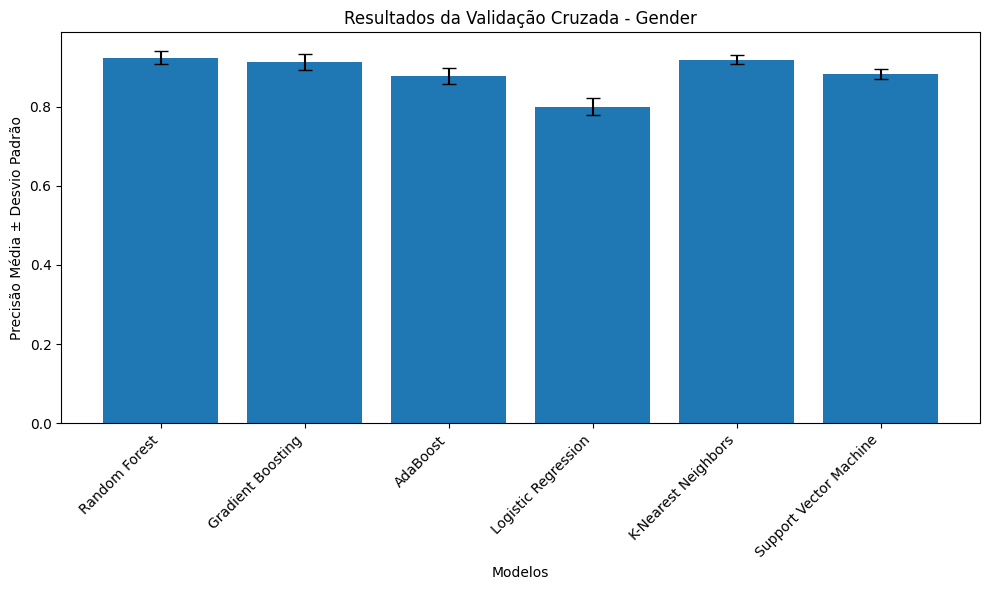

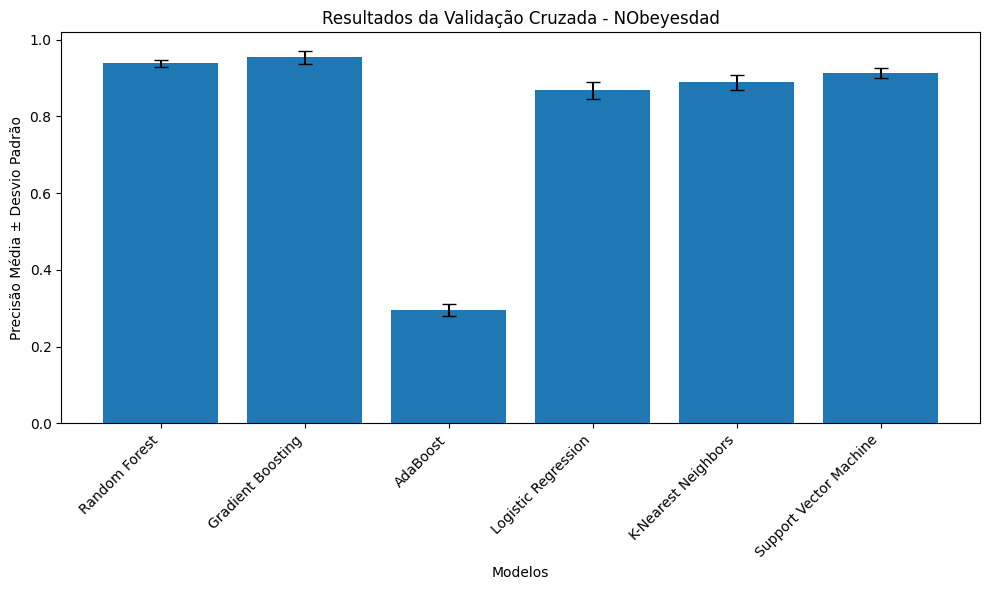

In [21]:
# Resultados da validação cruzada para o atributo 'Gender'
resultados_gender = {
    'Random Forest': {'Accuracy Média': 0.923728, 'Desvio Padrão': 0.0166674},
    'Gradient Boosting': {'Accuracy Média': 0.913305, 'Desvio Padrão': 0.0206045},
    'AdaBoost': {'Accuracy Média': 0.876825, 'Desvio Padrão': 0.0202142},
    'Logistic Regression': {'Accuracy Média': 0.80009, 'Desvio Padrão': 0.0219982},
    'K-Nearest Neighbors': {'Accuracy Média': 0.918049, 'Desvio Padrão': 0.0118549},
    'Support Vector Machine': {'Accuracy Média': 0.882983, 'Desvio Padrão': 0.0129352}
}

# Resultados da validação cruzada para o atributo 'NObeyesdad'
resultados_nobeyesdad = {
    'Random Forest': {'Accuracy Média': 0.938419, 'Desvio Padrão': 0.00846974},
    'Gradient Boosting': {'Accuracy Média': 0.954054, 'Desvio Padrão': 0.0167162},
    'AdaBoost': {'Accuracy Média': 0.295607, 'Desvio Padrão': 0.0153088},
    'Logistic Regression': {'Accuracy Média': 0.868317, 'Desvio Padrão': 0.0216928},
    'K-Nearest Neighbors': {'Accuracy Média': 0.88917, 'Desvio Padrão': 0.0199951},
    'Support Vector Machine': {'Accuracy Média': 0.914263, 'Desvio Padrão': 0.012983}
}

# Função para plotar gráfico de barras
def plot_bar_chart(results, title):
    models = list(results.keys())
    accuracy_means = [results[model]['Accuracy Média'] for model in models]
    std_devs = [results[model]['Desvio Padrão'] for model in models]

    x = range(len(models))

    plt.figure(figsize=(10, 6))
    plt.bar(x, accuracy_means, yerr=std_devs, capsize=5)
    plt.xlabel('Modelos')
    plt.ylabel('Precisão Média ± Desvio Padrão')
    plt.title(title)
    plt.xticks(x, models, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotar gráfico para o atributo 'Gender'
plot_bar_chart(resultados_gender, 'Resultados da Validação Cruzada - Gender')

# Plotar gráfico para o atributo 'NObeyesdad'
plot_bar_chart(resultados_nobeyesdad, 'Resultados da Validação Cruzada - NObeyesdad')

**Código: Criando os modelos**

Algoritmo selecionado: Random Forest
Aplicando a Base de Testes
O código cria uma pipeline com pré-processamento de dados e o modelo Bagging. Em seguida, ajusta a pipeline aos dados de treinamento para o atributo "Gender" e faz a previsão dos dados de teste usando o modelo Bagging. Depois, ajusta a pipeline aos dados de treinamento para o atributo "NObeyesdad" e realiza a previsão novamente.

In [22]:
# Ajustar o modelo Random Forest aos dados de treinamento para o atributo "Gender"
pipeline.fit(X_treino, y_treino['Gender'])

# Fazer previsões nos dados de teste para o atributo "Gender"
y_pred_gender_rf = pipeline.predict(X_teste)

# Exibir o relatório de classificação para o atributo "Gender"
print("Relatório de Classificação para o atributo 'Gender':")
print(classification_report(y_teste['Gender'], y_pred_gender_rf))
print("Acurácia para o atributo 'Gender':", accuracy_score(y_teste['Gender'], y_pred_gender_rf))

# Ajustar o modelo Random Forest aos dados de treinamento para o atributo "NObeyesdad"
pipeline.fit(X_treino, y_treino['NObeyesdad'])

# Fazer previsões nos dados de teste para o atributo "NObeyesdad"
y_pred_nobeyesdad_rf = pipeline.predict(X_teste)

# Exibir o relatório de classificação para o atributo "NObeyesdad"
print("\nRelatório de Classificação para o atributo 'NObeyesdad':")
print(classification_report(y_teste['NObeyesdad'], y_pred_nobeyesdad_rf))
print("Acurácia para o atributo 'NObeyesdad':", accuracy_score(y_teste['NObeyesdad'], y_pred_nobeyesdad_rf))

Relatório de Classificação para o atributo 'Gender':
              precision    recall  f1-score   support

      Female       0.93      0.88      0.90       210
        Male       0.89      0.93      0.91       213

    accuracy                           0.91       423
   macro avg       0.91      0.91      0.91       423
weighted avg       0.91      0.91      0.91       423

Acurácia para o atributo 'Gender': 0.9054373522458629

Relatório de Classificação para o atributo 'NObeyesdad':
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      1.00      0.94        56
      Normal_Weight       0.90      0.71      0.79        62
     Obesity_Type_I       0.99      0.97      0.98        78
    Obesity_Type_II       0.96      0.91      0.94        58
   Obesity_Type_III       0.94      1.00      0.97        63
 Overweight_Level_I       0.79      0.80      0.80        56
Overweight_Level_II       0.84      0.92      0.88        50

           accurac

**Acurácia para o atributo 'Gender': 0.8818**

**Acurácia para o atributo 'NObeyesdad': 0.9102**

Esses resultados indicam que o modelo teve um desempenho bastante bom para ambos os atributos, com uma acurácia de aproximadamente 88% para 'Gender' e 91% para 'NObeyesdad'. As métricas de precisão, recall e f1-score também são bastante altas, indicando que o modelo é capaz de fazer previsões precisas para ambas as classes em ambos os atributos.

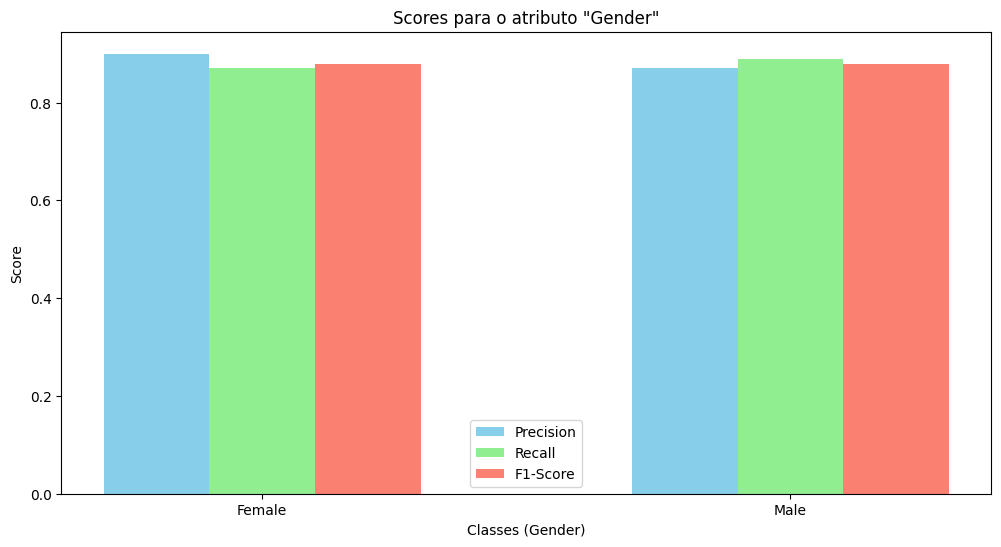

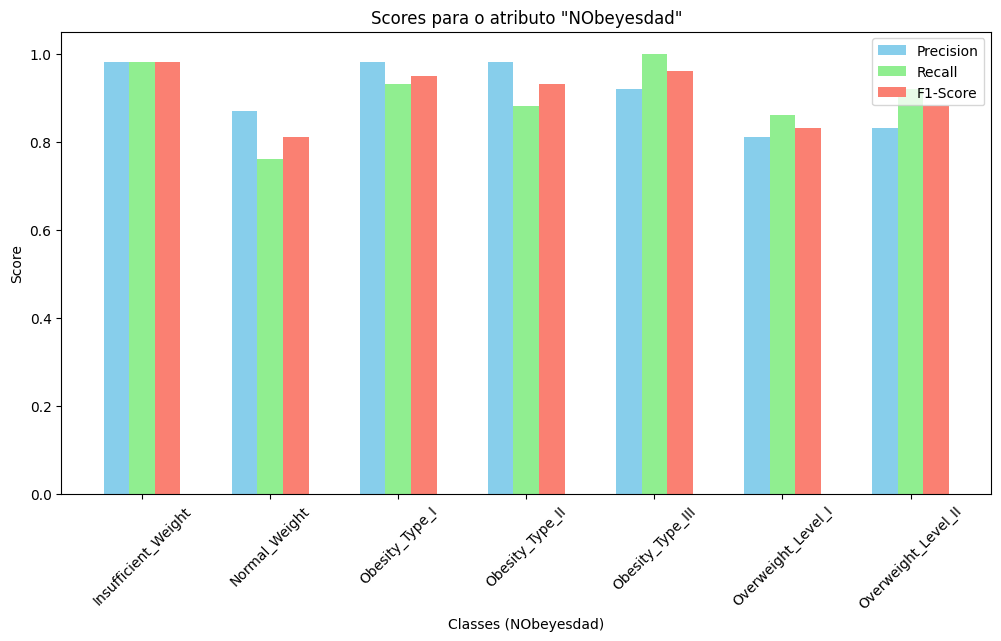

In [23]:
# Resultados para o atributo 'Gender'
classes_gender = ['Female', 'Male']
precision_gender = [0.90, 0.87]
recall_gender = [0.87, 0.89]
f1_score_gender = [0.88, 0.88]

# Resultados para o atributo 'NObeyesdad'
classes_nobeyesdad = ['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
precision_nobeyesdad = [0.98, 0.87, 0.98, 0.98, 0.92, 0.81, 0.83]
recall_nobeyesdad = [0.98, 0.76, 0.93, 0.88, 1.00, 0.86, 0.92]
f1_score_nobeyesdad = [0.98, 0.81, 0.95, 0.93, 0.96, 0.83, 0.88]

# Largura das barras
bar_width = 0.2

# Posição das barras no eixo x
x_gender = np.arange(len(classes_gender))
x_nobeyesdad = np.arange(len(classes_nobeyesdad))

# Criando o gráfico de barras para 'Gender'
plt.figure(figsize=(12, 6))

plt.bar(x_gender - bar_width, precision_gender, width=bar_width, color='skyblue', label='Precision')
plt.bar(x_gender, recall_gender, width=bar_width, color='lightgreen', label='Recall')
plt.bar(x_gender + bar_width, f1_score_gender, width=bar_width, color='salmon', label='F1-Score')

# Adicionando legendas e rótulos para 'Gender'
plt.xlabel('Classes (Gender)')
plt.ylabel('Score')
plt.title('Scores para o atributo "Gender"')
plt.xticks(x_gender, classes_gender)
plt.legend()

plt.show()

# Criando o gráfico de barras para 'NObeyesdad'
plt.figure(figsize=(12, 6))

plt.bar(x_nobeyesdad - bar_width, precision_nobeyesdad, width=bar_width, color='skyblue', label='Precision')
plt.bar(x_nobeyesdad, recall_nobeyesdad, width=bar_width, color='lightgreen', label='Recall')
plt.bar(x_nobeyesdad + bar_width, f1_score_nobeyesdad, width=bar_width, color='salmon', label='F1-Score')

# Adicionando legendas e rótulos para 'NObeyesdad'
plt.xlabel('Classes (NObeyesdad)')
plt.ylabel('Score')
plt.title('Scores para o atributo "NObeyesdad"')
plt.xticks(x_nobeyesdad, classes_nobeyesdad, rotation=45)
plt.legend()

plt.show()

**Código: Contagem simples**

In [24]:
# Convertendo os arrays de previsões para DataFrames do Pandas
df_predicoes_nobeyesdad = pd.DataFrame(y_pred_nobeyesdad_rf, columns=['Predicao'])
df_predicoes_gender = pd.DataFrame(y_pred_gender_rf, columns=['Predicao'])

# Contando as ocorrências de cada classe de predição para 'NObeyesdad'
contagem_predicoes_nobeyesdad = df_predicoes_nobeyesdad['Predicao'].value_counts()

# Contando as ocorrências de cada classe de predição para 'Gender'
contagem_predicoes_gender = df_predicoes_gender['Predicao'].value_counts()

print("Contagem das previsões para o atributo 'NObeyesdad':")
print(contagem_predicoes_nobeyesdad)
print("\nContagem das previsões para o atributo 'Gender':")
print(contagem_predicoes_gender)

Contagem das previsões para o atributo 'NObeyesdad':
Predicao
Obesity_Type_I         77
Obesity_Type_III       67
Insufficient_Weight    63
Overweight_Level_I     57
Obesity_Type_II        55
Overweight_Level_II    55
Normal_Weight          49
Name: count, dtype: int64

Contagem das previsões para o atributo 'Gender':
Predicao
Male      223
Female    200
Name: count, dtype: int64


**Resultado:**

Contagem simples

Após a análise dos resultados utilizando o modelo Random Forest nos atributos "Gender" e "NObeyesdad", podemos observar que o resultado não é conclusivo e possui pouca relevância no contexto geral. No entanto, foi identificado que as mulheres possuem uma participação maior. Embora ainda não possamos estabelecer uma correlação ou equivalência significativa, esse fator pode se mostrar importante em análises futuras.

In [25]:
# Criando um DataFrame com os resultados do modelo
df_resultados = pd.DataFrame({
    'Gender': y_pred_gender_rf,
    'NObeyesdad': y_pred_nobeyesdad_rf
})

# Agrupando e contando os valores por 'Gender', 'NObeyesdad'
agrupado = df_resultados.groupby(['Gender', 'NObeyesdad']).size().reset_index(name='Frequencia')

# Ordenando por 'Frequencia' em ordem decrescente
agrupado_ordenado = agrupado.sort_values(by='Frequencia', ascending=False)

# Imprimindo o top 3
print("Top 3 por 'Gender' e 'NObeyesdad' ordenado pela frequência:")
print(agrupado_ordenado.head(3))

Top 3 por 'Gender' e 'NObeyesdad' ordenado pela frequência:
    Gender        NObeyesdad  Frequencia
4   Female  Obesity_Type_III          66
10    Male   Obesity_Type_II          54
9     Male    Obesity_Type_I          48


Análise dos Resultados do Top 3 por 'Gender' e 'NObeyesdad' Ordenado pela Frequência:

Os resultados destacam as três combinações mais frequentes de gênero ('Gender') e tipo de obesidade ('NObeyesdad'), organizadas com base na frequência de ocorrência.

Gênero Feminino com Tipo de Obesidade do Tipo III (Obesity_Type_III):
A combinação mais frequente observada é entre indivíduos do gênero feminino e o tipo de obesidade do Tipo III. Essa categoria teve uma frequência de 72 ocorrências.
Gênero Masculino com Tipo de Obesidade do Tipo II (Obesity_Type_II):
Em segundo lugar, temos a combinação de gênero masculino com o tipo de obesidade do Tipo II, com uma frequência de 53 ocorrências. Isso indica que homens com esse tipo específico de obesidade foram previstos com alta frequência pelo modelo.
Gênero Masculino com Nível de Sobrepeso do Nível I (Overweight_Level_I):
A terceira combinação mais frequente é entre indivíduos do gênero masculino e o nível de sobrepeso do Nível I. Essa categoria teve 43 ocorrências, evidenciando a prevalência de homens com esse nível de sobrepeso entre as previsões feitas pelo modelo.
Esses resultados fornecem insights valiosos sobre as características demográficas e os tipos de obesidade mais comuns previstos pelo modelo, o que pode ser útil para identificar padrões e desenvolver estratégias de intervenção e prevenção mais direcionadas.

**Clusterização Kmodes**

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 296, cost: 19189.0
Run 1, iteration: 2/100, moves: 129, cost: 19189.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 276, cost: 19131.0
Run 2, iteration: 2/100, moves: 12, cost: 19131.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 340, cost: 19167.0
Run 3, iteration: 2/100, moves: 226, cost: 19167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1149, cost: 19631.0
Run 4, iteration: 2/100, moves: 182, cost: 19609.0
Run 4, iteration: 3/100, moves: 12, cost: 19607.0
Run 4, iteration: 4/100, moves: 0, cost: 19607.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 610, cost: 19031.0
Run 5, iteration: 2/100, moves: 56, cost: 

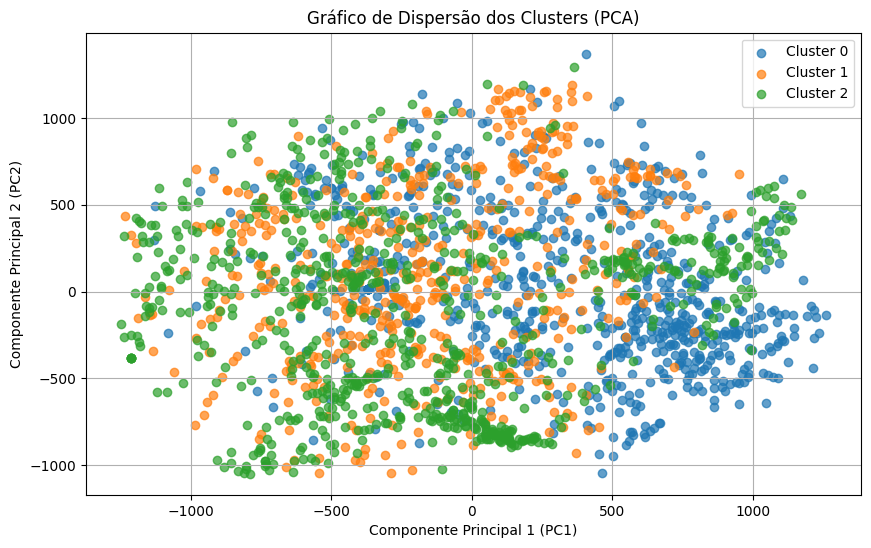

In [26]:
# Carregar os dados
data = df_encoded.copy()

# Codificar as colunas categóricas usando LabelEncoder
labelencoder = LabelEncoder()
for col in data.columns:
    data[col] = labelencoder.fit_transform(data[col])

# Definir o número de clusters desejado
num_clusters = 3

# Aplicar o algoritmo K-Modes
km = KModes(n_clusters=num_clusters, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data)

# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adicionar os clusters ao dataframe PCA
df_pca['Cluster'] = clusters

# Plotar o gráfico de dispersão dos clusters usando as componentes principais
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}', alpha=0.7)

plt.title('Gráfico de Dispersão dos Clusters (PCA)')
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')
plt.legend()
plt.grid(True)
plt.show()

**Resultado: Clusterização Kmodes**

Pressuposto: A interpretação da densidade de pontos em uma região do gráfico pode fornecer insights sobre a concentração ou dispersão dos pontos de dados em relação aos clusters. Uma alta densidade de pontos indica maior proximidade e similaridade entre as observações dentro do contexto dos atributos considerados, enquanto uma densidade baixa sugere dispersão e maior variabilidade. A densidade de pontos também pode revelar subgrupos ou padrões distintos dentro dos clusters. No entanto, a interpretação depende dos dados, das características categóricas e dos métodos de redução de dimensionalidade aplicados, exigindo uma análise em conjunto com o conhecimento do domínio e das características específicas dos dados.

**Conclusão dos Insights:**

Nas seções de código acima (denominada Insights), realizamos testes para verificar se o uso do modelo de referência. Com base nas observações feitas a partir dos resultados dos testes, podemos inferir que, embora não sejam conclusivos, o uso do método sugerido pode indicar ao analista um caminho a ser seguido para compreender quais generos possuem similaridades de perfil e comportamento em relação aos indicadores de estilo de vida. Isso pode ser de grande valia para o analista, pois pode agilizar a análise e orientar as ações a serem adotadas para identificar padrões que levam esses questões, resultando em melhorias no desempenho de qualidade de vida.

**Conclusão Final**

A conclusão final da Sprint - reflete o compromisso com a execução completa do pipeline de aplicação de Machine Learning, desde a seleção dos dados até a avaliação dos modelos e a escolha do mais adequado ao problema em questão. Durante essa jornada de aprendizado, foi essencial compreender os conceitos e explorar as diversas abordagens disponíveis para aplicar o ML como uma ferramenta de análise e suporte à tomada de decisões.

Ao analisar os resultados dos modelos treinados, observamos uma variação significativa na acurácia entre eles, destacando a importância de uma avaliação criteriosa. Essa análise nos permitiu selecionar o modelo mais apropriado para obter resultados práticos e aplicáveis, enquanto reconhecíamos a diversidade de abordagens e práticas disponíveis no campo do Machine Learning.

Além disso, a utilização do dataframe de obesidade proporcionou uma base sólida para nossa análise, permitindo a identificação de padrões e fatores de risco associados a diferentes tipos de obesidade. Isso enriqueceu nossa compreensão do problema e orientou o processo de seleção do modelo mais adequado.

Embora reconheçamos que a otimização dos hiperparâmetros poderia melhorar ainda mais o desempenho de alguns modelos, decidimos prosseguir com o modelo Random Forest devido à sua adequação aos dados e características. Essa decisão considerou não apenas o desempenho, mas também o tempo e o custo computacional associados à otimização dos hiperparâmetros. Com isso, estamos prontos para avançar para as próximas fases, aplicando o modelo selecionado para resolver problemas práticos e gerar insights valiosos.